<a href="https://colab.research.google.com/github/AbinReji07/Bitcoin-Price-Prediction-using-RNN/blob/main/bitcoin_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/BTC-USD.csv",index_col="Date",parse_dates=True,usecols=["Date","Close"])
df.head()
df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-07-15,30295.806641
2023-07-16,30249.132813
2023-07-17,30145.888672


In [ ]:
df.dtypes

,0
Close,float64


<Axes: xlabel='Date'>

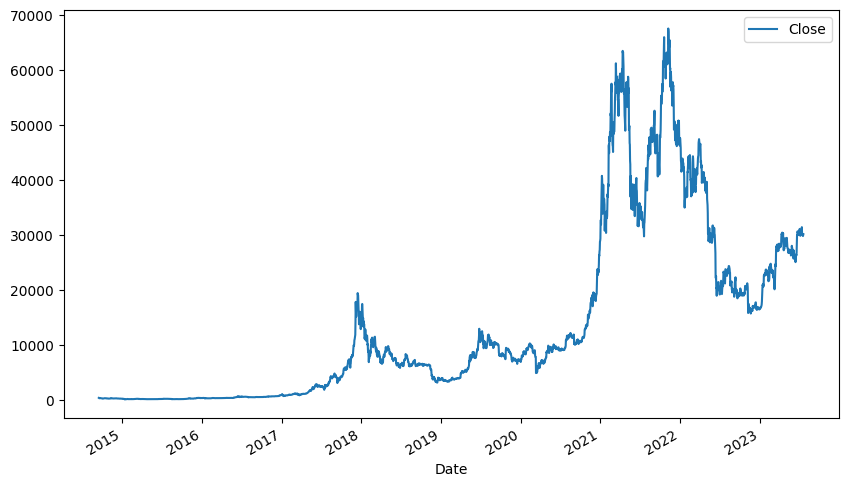

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,6))

In [ ]:
df.shape

(3228, 1)

In [ ]:
train=df.iloc[0:3216]
test=df.iloc[3216:]

In [ ]:
test.shape

(12, 1)

In [ ]:
test

,Close
Date,
2023-07-08,30292.541016
2023-07-09,30171.234375
2023-07-10,30414.470703
2023-07-11,30620.951172
2023-07-12,30391.646484
2023-07-13,31476.048828
2023-07-14,30334.068359
2023-07-15,30295.806641
2023-07-16,30249.132813


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.fit_transform(test)

In [ ]:
scaled_train[:10]

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       [0.00342492],
       [0.0032753 ],
       [0.00332473],
       [0.0038239 ],
       [0.00363714],
       [0.00346454],
       [0.00335845]])

In [ ]:
scaled_test

array([[0.2692079 ],
       [0.19430351],
       [0.34449701],
       [0.47199452],
       [0.33040352],
       [1.        ],
       [0.29485019],
       [0.27122436],
       [0.24240422],
       [0.17865305],
       [0.        ],
       [0.2058306 ]])

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(128,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=50,batch_size=5)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3204/3204 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 0.0047
Epoch 2/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 5.5628e-04
Epoch 3/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 4.4918e-04
Epoch 4/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 3.6590e-04
Epoch 5/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - loss: 2.5396e-04
Epoch 6/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 2.9221e-04
Epoch 7/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - loss: 2.3329e-04
Epoch 8/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 2.2083e-04
Epoch 9/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 2.1744e-04
Epoch 10/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 2.1402e-04
Epoch 11/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - loss: 2.2145e-04
Epoch 12/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 2.0501e-04
Epoch 13/50
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - loss: 2.2001e-04
Epoch 14/50
3204/3204 ━━━━━━━━━━━━━━

In [ ]:
last_train_batch=scaled_train[-12:]

In [ ]:
last_train_batch.shape

In [ ]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
import numpy as np

In [ ]:
test_predictions=[]
first_eval_bath=scaled_train[-12:]
current_batch=first_eval_bath.reshape(1,12,1)
for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
scaled_test

In [ ]:
test_predictions

In [ ]:
prediction=scaler.inverse_transform(test_predictions)
prediction

In [ ]:
test["prediction"]=prediction
test

In [ ]:
test.plot(figsize=(10,6))

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(test["Close"],test["prediction"]))

In [ ]:
print(r2_score(test["Close"],test["prediction"]))